In [18]:
import pandas
movies = pandas.read_csv('fandango_score_comparison.csv')


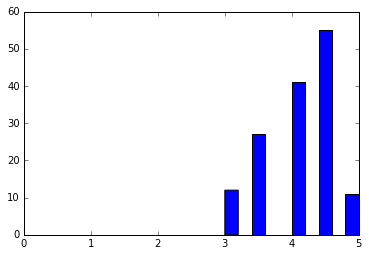

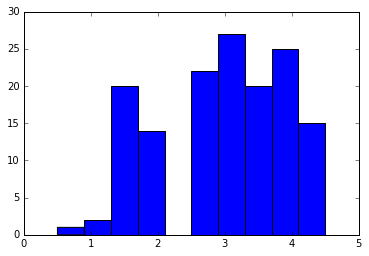

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(movies["Fandango_Stars"])
plt.xlim(0,5)
plt.show()
plt.hist(movies["Metacritic_norm_round"])
plt.xlim(0,5)
plt.show()


In [23]:
fandangomean = movies["Fandango_Stars"].mean()
metamean = movies["Metacritic_norm_round"].mean()
fanmedian = movies["Fandango_Stars"].median()
metamedian = movies["Metacritic_norm_round"].median()

In [25]:
fanstd = movies["Fandango_Stars"].std()
metastd = movies["Metacritic_norm_round"].std()

In [26]:
print(fandangomean)
print(metamean)
print(metamedian)
print(fanmedian)
print(fanstd)
print(metastd)

4.08904109589
2.97260273973
3.0
4.0
0.540385977979
0.990960561374


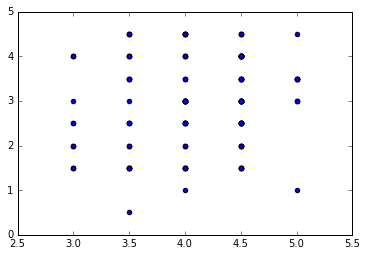

In [27]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
plt.show()

In [28]:
fm_diff = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

In [29]:
movies["fm_diff"] = fm_diff

In [30]:
movies["fm_diff"] = abs(movies["fm_diff"])

In [31]:
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [37]:
from scipy.stats import pearsonr


In [38]:
r_value,p_value = pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

In [39]:
r_value

0.17844919073895918

In [40]:
from scipy.stats import linregress

In [44]:
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])

In [45]:
pred_3 = 3 * slope + intercept

In [46]:
pred_3

4.0917071528212041

In [47]:
pred_1 = 1 * slope + intercept

In [48]:
pred_1

3.897084996873347

In [49]:
pred_5 = 5* slope + intercept

In [50]:
pred_5

4.2863293087690604

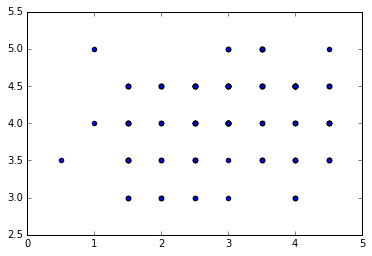

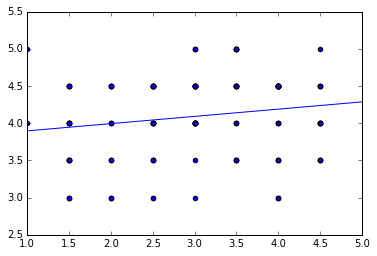

In [54]:
plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()